In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10

(-1, 11)

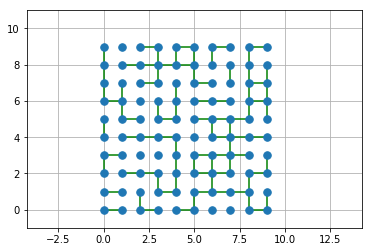

In [21]:
# Goal: solve fences puzzles with integer program ( we'd like to find methods and patterns of solution)
# 
# Possible resources (COIN-OR) or possibly (integer programming with textbook of conforti)
# the variables are the state of each edge.  

M = 10
N = 10

pt = [[a,b] for a in range(M) for b in range(N)]

pt = np.array(pt)

# these edges might not be independent or random
edge = [ [a,b,a+1,b]  for a in range(M-1) for b in range(N) if np.random.random() > 0.5 ] 
# how do we find the "connected" components in this graph?
for e in edge:
    plt.plot( [e[0],e[2]] , [e[1],e[3]] , 'g-' )
edge = [ [a,b,a,b+1]  for a in range(M) for b in range(N-1) if np.random.random() > 0.5 ] 
for e in edge:
    plt.plot( [e[0],e[2]] , [e[1],e[3]] , 'g-' )

plt.plot( pt[:,0] , pt[:,1] , '.' , markersize=15)
plt.axis("Equal")
plt.grid(True)
plt.xlim([-1,M+1])
plt.ylim([-1,M+1])

(-1, 11)

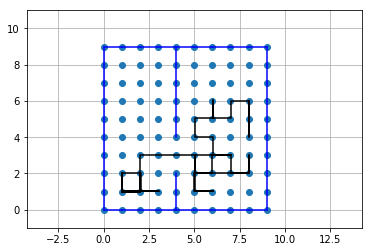

In [46]:
# how to get a single closed loop?

M = 10
N = 10

pt = [[a,b] for a in range(M) for b in range(N)]

pt = np.array(pt)
plt.plot( pt[:,0] , pt[:,1] , '.' , markersize=12)



wall  = [ (0,n) for n in range(10)] + [(n,0) for n in range(10)] + [(4,n) for n in range(10) if n != 3]
wall += [ (9,n) for n in range(10)] + [(n,9) for n in range(10)]

for n in range(9):
    plt.plot( [0,0] , [n,n+1], 'b-')
    plt.plot( [9,9], [n,n+1], 'b-')
    plt.plot( [n,n+1],[0,0], 'b-')
    plt.plot( [n,n+1],[9,9], 'b-')
    
    if n not in [2,3]:
        plt.plot( [4,4], [n, n+1], 'b-')

# our data type "edge" should equation [a,b,c,d] and [c,d,a,b]

a,b = 1,1

x,y = a,b

path = [(x,y)]

for t in range(100):
    c = int(4*np.random.random())
    
    if c == 0:
        if (a-1,b) not in wall:
            a -= 1
            x  = a + 0.05*np.random.random()
    elif c == 1:
        if (a+1,b) not in wall:
            a += 1
            x  = a + 0.05*np.random.random()
    elif c == 2:
        if (a,b-1) not in wall:
            b -= 1
            y  = b + 0.05*np.random.random()
    elif c == 3:
        if (a,b+1) not in wall:
            b += 1
            y  = b + 0.05*np.random.random()
    else:
        pass
    path += [[x,y]]

plt.plot( [pt[0] for pt in path], [pt[1] for pt in path], 'k-' )


plt.axis("Equal")
plt.grid(True)
plt.xlim([-1,M+1])
plt.ylim([-1,M+1])

In [67]:
# how to get a single closed loop?

def getPath():

    M = 10
    N = 10

    pt = [[a,b] for a in range(M) for b in range(N)]

    pt = np.array(pt)




    wall  = [ (0,n) for n in range(10)] + [(n,0) for n in range(10)] + [(4,n) for n in range(10) if n != 3]
    wall += [ (9,n) for n in range(10)] + [(n,9) for n in range(10)]



    # our data type "edge" should equation [a,b,c,d] and [c,d,a,b]

    a,b = 1,1

    x,y = a,b

    path = [(x,y)]

    for t in range(100):
        c = int(4*np.random.random())

        if c == 0:
            if (a-1,b) not in wall:
                a -= 1
                x  = a + 0.05*np.random.random()
        elif c == 1:
            if (a+1,b) not in wall:
                a += 1
                x  = a + 0.05*np.random.random()
        elif c == 2:
            if (a,b-1) not in wall:
                b -= 1
                y  = b + 0.05*np.random.random()
        elif c == 3:
            if (a,b+1) not in wall:
                b += 1
                y  = b + 0.05*np.random.random()
        else:
            pass
        path += [[x,y]]
        
    return path



(-1, 50)

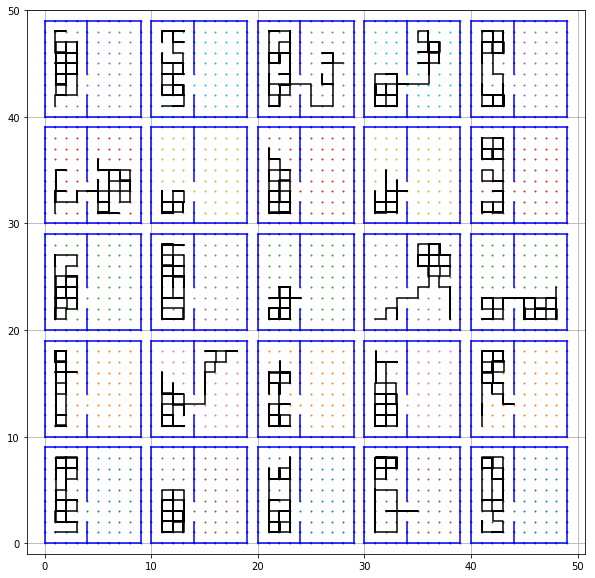

In [68]:
# keywords: HAMMERSLEY ... RIORDAN ... BOLLOBAŚ

for s in range(5):
    for t in range(5):

        path = getPath()

        plt.plot( pt[:,0] + 10*s , pt[:,1] + 10*t , '.' , markersize=2)


        for n in range(9): 
            plt.plot( [0+10*s,  0+10*s]  , [n+10*t,n+1+10*t], 'b-')
            plt.plot( [9+10*s,  9+10*s]  , [n+10*t,n+1+10*t], 'b-')
            plt.plot( [n+10*s,n+1+10*s]  , [0+10*t,0+10*t]  , 'b-')
            plt.plot( [n+10*s,n+1+10*s]  , [9+10*t,9+10*t]  , 'b-')

            if n not in [2,3]:
                plt.plot( [4+10*s,4+10*s], [n+10*t, n+1+10*t], 'b-')

        plt.plot( [pt[0] + 10*s for pt in path], [pt[1]+ 10*t for pt in path], 'k-' )


plt.axis("Equal")
plt.grid(True)
plt.xlim([-1,5*M])
plt.ylim([-1,5*M])

In [72]:
def overlap(x,y):
    a,b = x
    c,d = y
    
    if b > a:
        z = (b,a)
        return overlap(z,y)
    elif d > c:
        z = (d,c)
        return overlap(x,z)
    elif a > c:
        return overlap(y,x)
    else:
        return (c > b)

In [73]:
# eventually define Rectangle object

def overlapR(x,y):
    (a,b),(c,d) = x
    (e,f),(g,h) = y
    
    A = (a,b)
    C = (c,d)
    E = (e,f)
    G = (g,h)
    return overlap(A,E) and overlap(C,G)

In [75]:
rectangle = []

a,b,c,d = np.random.random(4)

R = [[a,b],[c,d]]

[ overlap(R,r) for r in rectangle ]

#if R not in rectangle:
#    rectangle += [R]  
#rectangle

[[[0.29283679451143896, 0.6302249453603646],
  [0.00016387049978883184, 0.6080761274888671]]]

(-0.04310840637726983,
 1.047573571480582,
 -0.04910679297729778,
 1.0472847179440294)

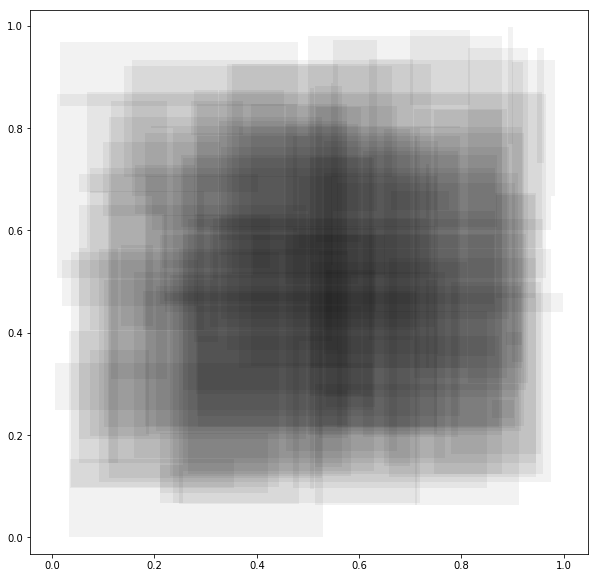

In [85]:
for t in range(100):
    
    L = np.random.random()
    a,b,c,d = np.random.random(4)
    plt.fill( [a,b,b,a] , [c,c,d,d] , 'k', alpha=0.05 )
    #plt.fill( [a,b,b,a] , [c,c,d,d] , 'k', alpha=0.1 )
plt.axis("Equal")

(-0.08711264964566068,
 1.942054073566688,
 -0.04559709273034018,
 1.9576982201296866)

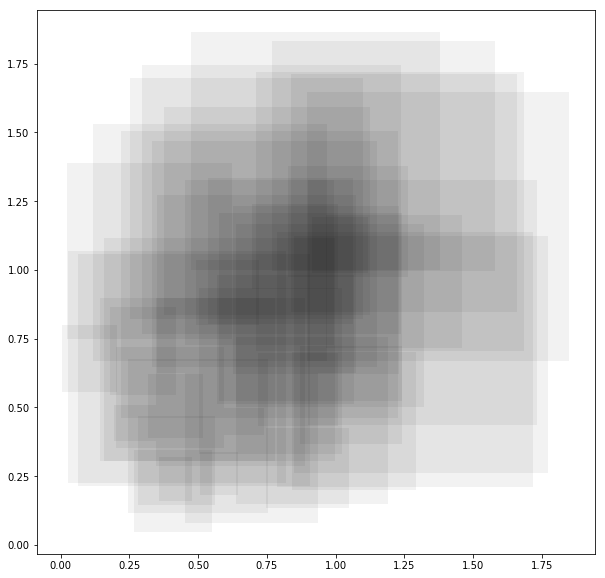

In [89]:
for t in range(50):
    
    L = np.random.random()
    dx,dy = np.random.random(2)
    a,c = np.random.random(2)
    R = [[a, a + L + 0.1*dx ],[c, c + L + 0.1*dy ]]
    plt.fill( [R[0][0],R[0][1],R[0][1],R[0][0]] , [R[1][0],R[1][0],R[1][1],R[1][1]] , 'k', alpha=0.05 )
    #plt.fill( [a,b,b,a] , [c,c,d,d] , 'k', alpha=0.1 )
plt.axis("Equal")

([], <a list of 0 Text yticklabel objects>)

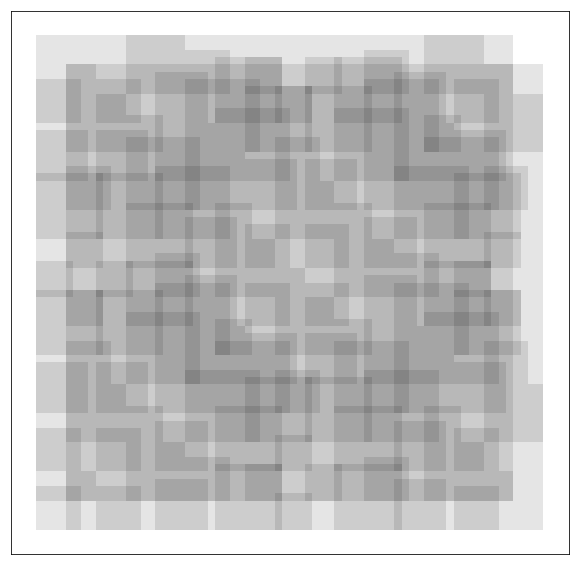

In [100]:
# less is more
p = 7

for s in range(-1,15):
    for t in range(-1,15):
        if (s+t)%2 == 0:
            L = 1 + 0.25*((s**2+t**2)%p)
        else:
            L = 2
        plt.fill( [s,s+L,s+L,s] , [t,t,t+L,t+L] , 'k', alpha=0.1)
        
#plt.axis("Off")
plt.xticks([])
plt.yticks([])

In [198]:
# perhaps we can quantify this to a distance? 

def overlap(X,Y):
    
    delta = 0.01
    
    horizontal1 = ( ( X[0][0] + delta < Y[0][1] ) and (X[0][1] + delta > Y[0][0] ) ) 
    horizontal2 = ( ( Y[0][0] + delta < X[0][1] ) and (Y[0][1] + delta > X[0][0] ) )
    horizontal  = horizontal1 or horizontal2
    #print(horizontal1)
    #print(horizontal2)
    vertical1   = ( ( X[1][0] + delta < Y[1][1] ) and (X[1][1] + delta > Y[1][0] ) ) 
    vertical2   = ( ( Y[1][0] + delta < X[1][1] ) and (Y[1][1] + delta > X[1][0] ) )
    vertical    = vertical1   or vertical2 
    # horizontal and vertial overlap
    return horizontal and vertical

A = [[0,2],[3,5]]
B = [[3,5],[4,7]]

overlap(A,B)

False

In [219]:
rectangle = []

t = 0

eps = 0.00

while t < 150:
    
    a,c = 1.25*np.random.random(2)
    L1 = (0.25 - eps)*np.random.random() + eps
    L2 = (0.25 - eps)*np.random.random() + eps
    b,d = a + L1, c + L2
    if a > b:
        a,b = b,a
    if c > d:
        c,d = d,c
    rectangle += [[[a,b],[c,d]]]
    
    X = rectangle[-1]
    o = False
    for s in range(t):
        Y = rectangle[s]
        o = o or overlap(X,Y)
        #print(X)
        #print(Y)
        #print(o)
    
    if o:
        rectangle = rectangle[:-1]
    else:
        t += 1        
    #print(t, sum([1 for r in rectangle]))


#rectangle

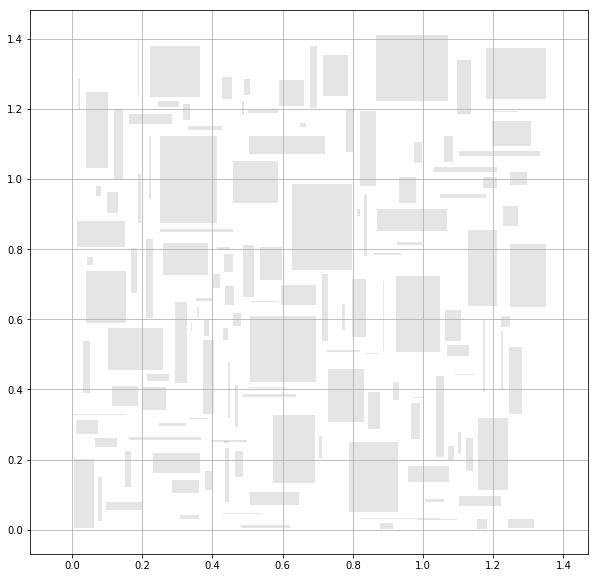

In [222]:
for r in rectangle:
    plt.fill( [r[0][0], r[0][1], r[0][1], r[0][0]] , [r[1][0], r[1][0], r[1][1], r[1][1]], 'k', alpha=0.1)

plt.axis("Equal")
#plt.axis("Off")
plt.grid(True)